# 070. Random Forest

## Titanic 호의 생존 예측

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

dataset = pd.read_csv("datasets/titanic.csv")

In [2]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [5]:
mean_age = dataset['Age'].mean()

dataset['Age'].fillna(mean_age, inplace=True)

In [6]:
dataset = pd.get_dummies(dataset)

dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [7]:
Y = dataset['Survived'].values
X = dataset.drop(['Survived'], axis=1).values

In [8]:
# dataset 을 Training 과 Test set 으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [9]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
print(X_train.shape)

(712, 10)


In [10]:
# Training set 에 대해 Random Forest Classifier model 을 fitting
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [11]:
y_pred = classifier.predict(X_test)

print(y_pred)
print()
print("Test set true counts = ", sum(y_test))
print("predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0
 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1]

Test set true counts =  69
predicted true counts =  61
accuracy = 0.81


## confusion matrix 를 이용한 model 평가

confution matrix
 [[48 21]
 [13 97]]


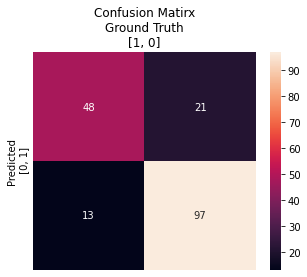

In [12]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import  accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns

cm  = confusion_matrix(y_test, y_pred, labels=[1, 0])

print("confution matrix\n", cm)

plt.figure(figsize=(5,4))

ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=False, yticklabels=False)
ax.set_ylabel('Predicted\n [0, 1]')
ax.set_title('Confusion Matirx\nGround Truth\n[1, 0]')
None

In [13]:
print("f1 score : ", f1_score(y_test, y_pred, labels=[1, 0]))

f1 score :  0.7384615384615385


## 네트워크 침입 탐지기 모델 작성

- IDS dataset. 


- 침입 또는 공격이라고 하는 불량 연결과 정상 연결을 구분할 수있는 예측 모델을 구축

In [83]:
df = pd.read_csv("security_data/kddcup99.csv")

In [84]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,smurf
1,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,smurf
2,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,smurf
3,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,10,0.99,1.0,0.0,0.0,0.09,0.07,0.0,255,3,0.01,0.07,0.00,0.00,1.00,1.00,0.0,0.0,neptune
4,0,tcp,http,SF,154,2546,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.0,0.0,0.0,1.00,0.00,0.0,42,255,1.00,0.00,0.02,0.03,0.02,0.01,0.0,0.0,normal


In [85]:
df.shape

(100000, 42)

In [86]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [87]:
df['label'].value_counts()

smurf              56774
neptune            21783
normal             19718
back                 454
satan                292
portsweep            230
ipsweep              223
teardrop             203
warezclient          201
nmap                  47
pod                   46
guess_passwd           8
land                   6
buffer_overflow        5
imap                   2
ftp_write              2
warezmaster            2
perl                   1
rootkit                1
multihop               1
loadmodule             1
Name: label, dtype: int64

In [88]:
Y = df.pop('label')

In [89]:
df.shape

(100000, 41)

In [90]:
df.describe(include=['object'])

,protocol_type,service,flag
count,100000,100000,100000
unique,3,63,11
top,icmp,ecr_i,SF
freq,57282,56884,76517


In [91]:
df = pd.get_dummies(df)

In [92]:
df.shape

(100000, 115)

In [93]:
pd.options.display.max_columns=None
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.00,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,111,10,0.99,1.0,0.0,0.0,0.09,0.07,0.0,255,3,0.01,0.07,0.00,0.00,1.00,1.00,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,154,2546,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.0,0.0,0.0,1.00,0.00,0.0,42,255,1.00,0.00,0.02,0.03,0.02,0.01,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [94]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
Y = label.fit_transform(Y)

print(Y)
print(label.classes_)

[17 17 17 ... 17 17  9]
['back' 'buffer_overflow' 'ftp_write' 'guess_passwd' 'imap' 'ipsweep'
 'land' 'loadmodule' 'multihop' 'neptune' 'nmap' 'normal' 'perl' 'pod'
 'portsweep' 'rootkit' 'satan' 'smurf' 'teardrop' 'warezclient'
 'warezmaster']


In [96]:
# train / test dataset split
X_train, X_test, y_train, y_test = \
        train_test_split(df.values, Y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(80000, 115) (80000,)
(20000, 115) (20000,)


In [97]:
# Fitting RandomForest
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [98]:
# predict test set
y_pred = clf.predict(X_test)

# Confusion matrix
from sklearn.metrics import accuracy_score

print('Test Accuracy :', accuracy_score(y_test, y_pred))

Test Accuracy : 0.9834
